<a href="https://colab.research.google.com/github/omnagpure/DSA-ASSIGNMENTS/blob/main/LLM_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing all necessary libraries
!pip install -q -U transformers \
  accelerate \
  chassisml \
  peft \
  bitsandbytes \
  trl \
  diffusers \
  xformers \
  datasets\
  faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.0 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu


#NLP basics

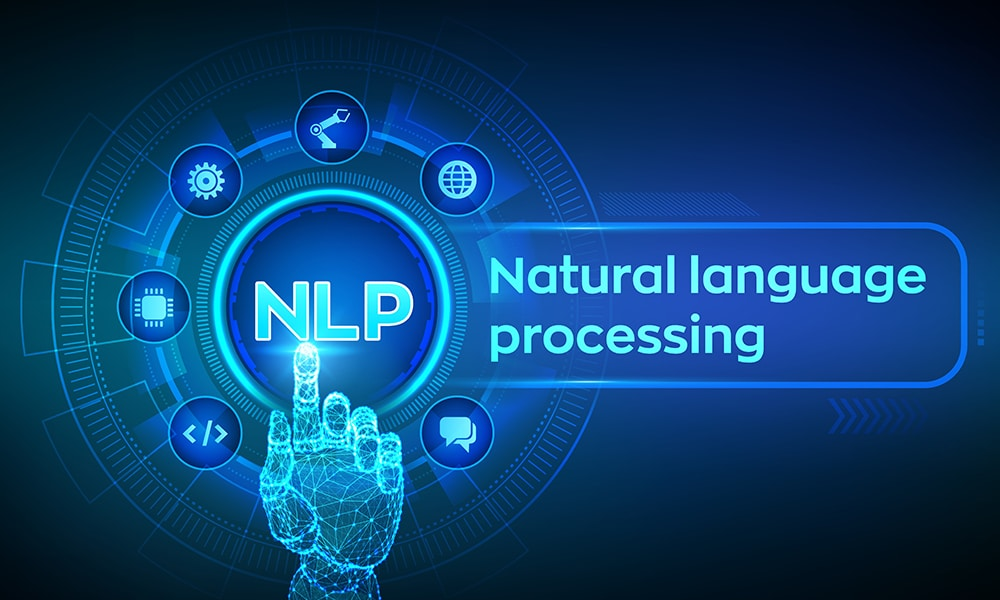


**Tokenization, Word Embeddings, and Word Representations:**

Tokenization is the process of breaking down a piece of text into smaller units called tokens, such as words or subwords. It helps in preparing data for language models by creating a standardized representation. Word embeddings are numerical vectors that capture the semantic meaning of words. They allow us to represent words in a dense and continuous space, preserving semantic relationships. Word representations play a crucial role in understanding word context and similarity.
Tokenization:
Example sentence: "I love eating ice cream."
Tokenized words: ["I", "love", "eating", "ice", "cream", "."]


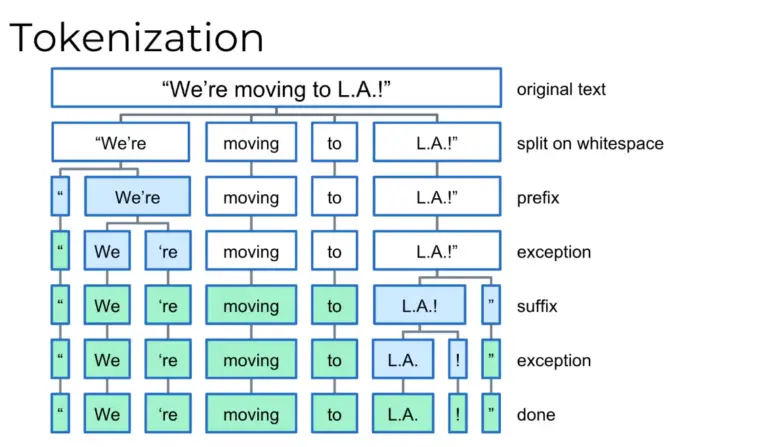

Word Embeddings:
Imagine we have a magic dictionary that transforms words into special numbers. For the words in our example sentence:
"I" -> [0.1, 0.3, -0.5]
"love" -> [0.7, -0.2, 0.9]
"eating" -> [-0.4, 0.6, -0.8]
"ice" -> [0.5, 0.7, 0.1]
"cream" -> [0.9, -0.3, 0.4]
"." -> [0.0, 0.0, 0.0]

Below is example of how to do it using code.

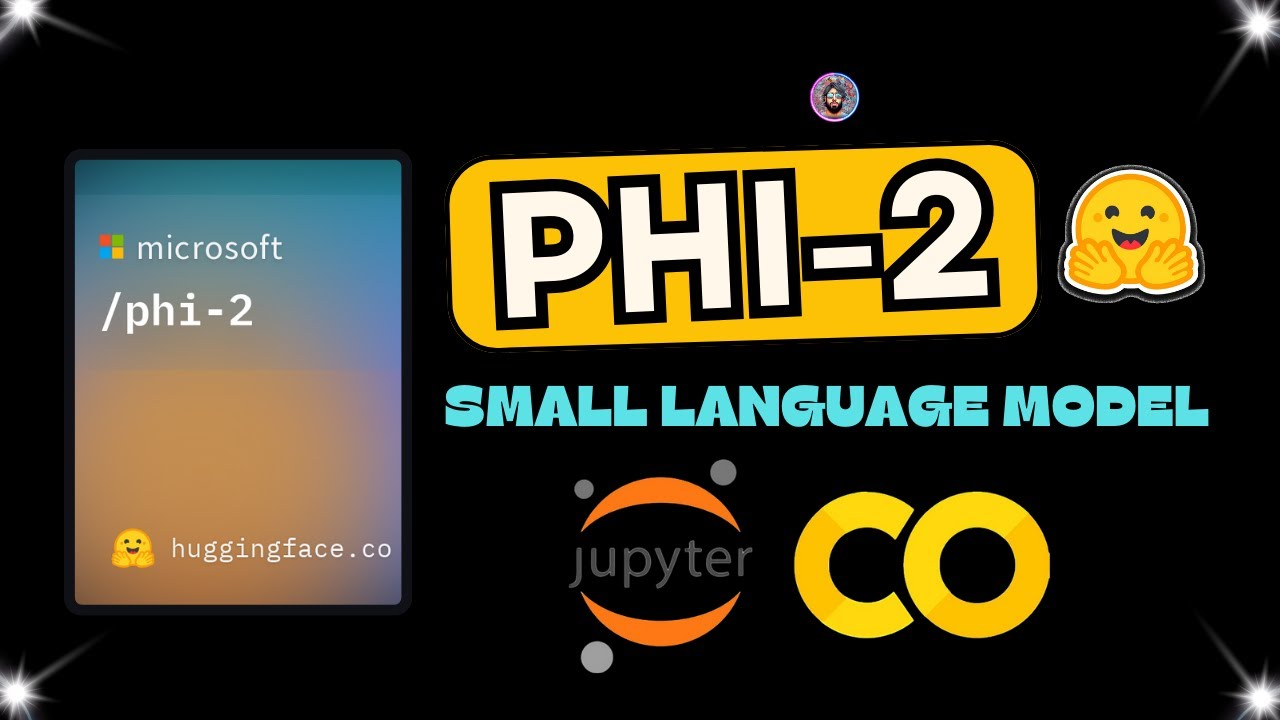

In [ ]:
from transformers import AutoTokenizer

tokenizer=AutoTokenizer.from_pretrained("microsoft/phi-2") ### Model which you are using

# set the prompt
prompt = "Hello my name is Prajwal, What is your name?"
encoded_prompt = tokenizer.encode(prompt)

# print the prompt
print(f"prompt: {prompt}")
print(f"encoded: {encoded_prompt}")

# print out as a loop
for item in encoded_prompt:
  decoded = tokenizer.decode(item)
  print(f"|{item}|:|{decoded}|")

# print out the length
print()
print(f"length: {len(encoded_prompt)}")

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

prompt: Hello my name is Prajwal, What is your name?
encoded: [15496, 616, 1438, 318, 21127, 73, 16783, 11, 1867, 318, 534, 1438, 30]
|15496|:|Hello|
|616|:| my|
|1438|:| name|
|318|:| is|
|21127|:| Pra|
|73|:|j|
|16783|:|wal|
|11|:|,|
|1867|:| What|
|318|:| is|
|534|:| your|
|1438|:| name|
|30|:|?|

length: 13


#Accessing LLM'S

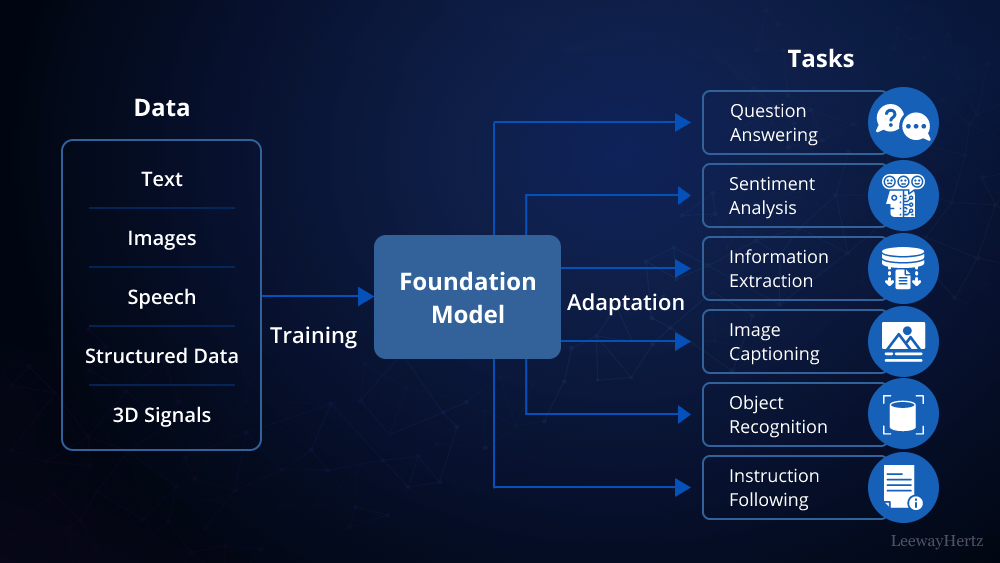

##[Introduction to huggingface](https://huggingface.co/)

###Image generation

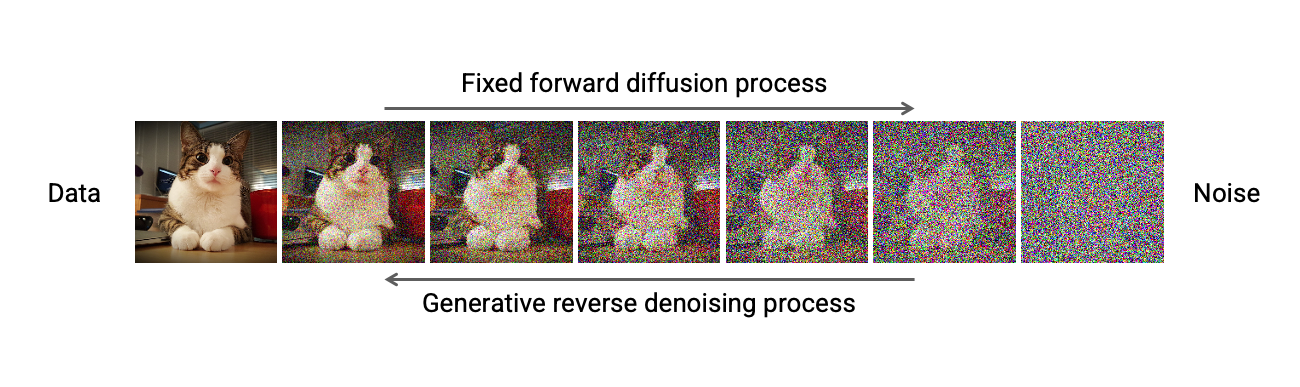

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

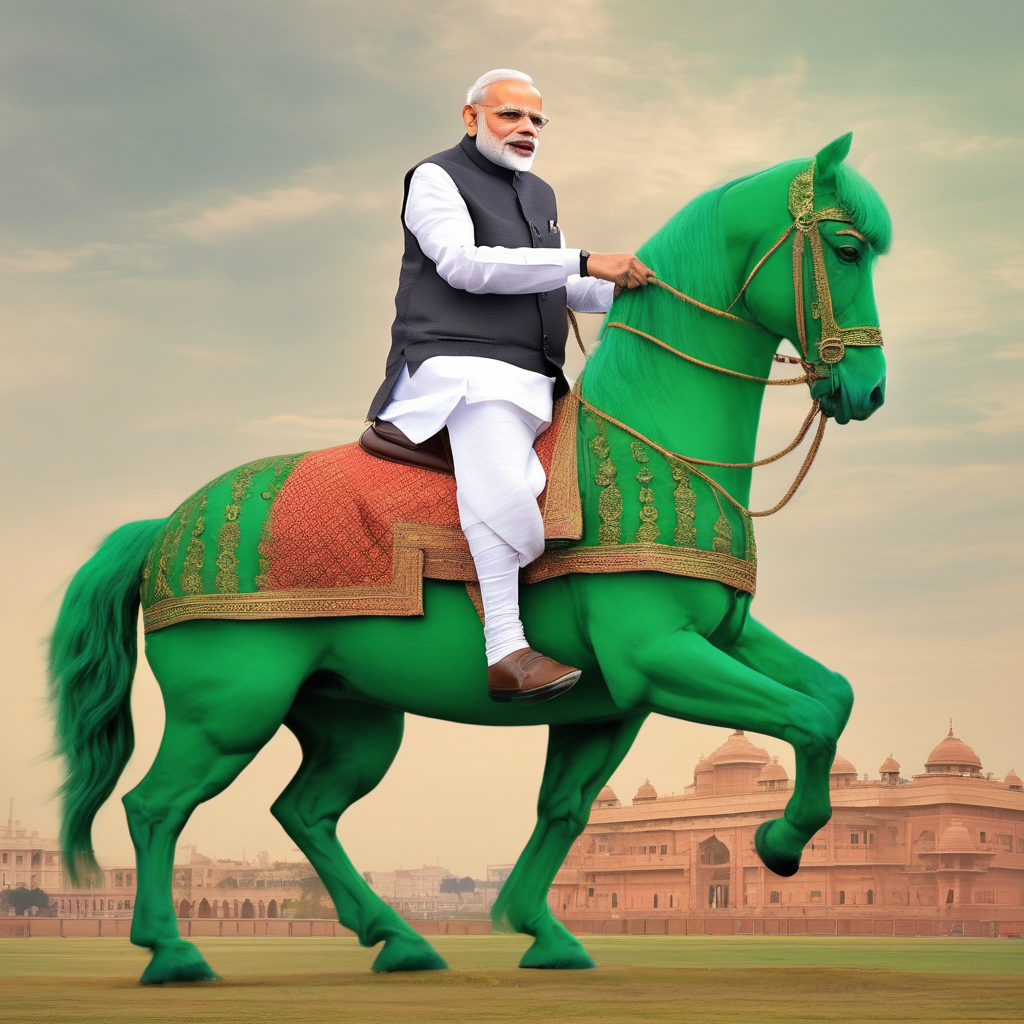

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "PM Narendra Modi riding a green horse"

images = pipe(prompt=prompt).images[0]
images

###Text to speech

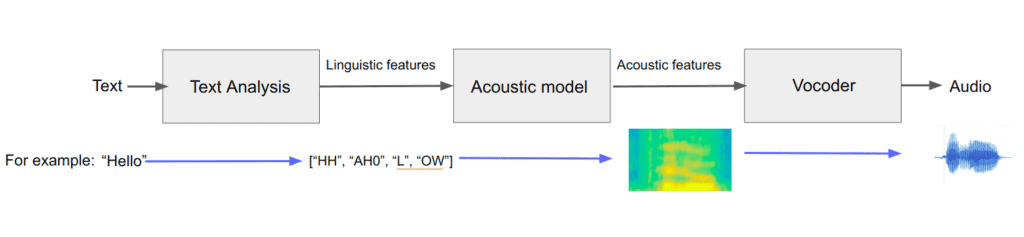

In [ ]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from IPython.display import Audio
from transformers import pipeline
import numpy as np
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Sample dialogue
talk = '''
John: Hey Sarah, have you heard about Large Language Models like GPT-4?
Sarah: Yes, I have! They're quite fascinating. I know they can generate human-like text. But I'm not entirely clear on how they work. Can you explain?
John: Absolutely. Large Language Models, or LLMs, are a type of artificial intelligence that can understand and generate text. They are trained on vast amounts of data from the internet to learn the patterns and structures of human language.
Sarah: So, they basically learn from all the text data they are fed?
'''

# Split text into chunks
rt = RecursiveCharacterTextSplitter(separators='\n', chunk_size=100, chunk_overlap=0)
docs = rt.split_text(talk)


In [ ]:
from transformers import pipeline
from datasets import load_dataset
import torch
import numpy as np
from IPython.display import Audio

# Initialize the TTS pipeline
synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

# Load speaker embeddings
embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

# Generate speech from text chunks
audio_all = np.array([])

for i in docs:
     speech = synthesiser(i, forward_params={"speaker_embeddings": speaker_embedding})
     audio_all = np.concatenate((audio_all, speech['audio']), axis=None)

# Play the audio
Audio(audio_all, rate=15000)

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

Device set to use cuda


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

cmu-arctic-xvectors.py:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/21.3M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/7931 [00:00<?, ? examples/s]

In [ ]:
import gc
del synthesiser
gc.collect()

106

###Text generation

- `AutoModelForCausalLM.from_pretrained()` Loads the pre-trained language model based on the specified name using the AutoModelForCausalLM class, which is suitable for generating text one word at a time.
- `AutoTokenizer.from_pretrained()` Loads the associated tokenizer, which is responsible for converting text into numerical representations and vice versa, ensuring compatibility between the model and the text input.


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM,pipeline
import transformers
import torch

model_name = 'openai-community/gpt2'

# Load the model
model = AutoModelForCausalLM.from_pretrained(model_name)

# get the tokenizer from the model
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Create a pipeline for text generation
# provide model and tokenizer created above
# device_map - auto Instructs the pipeline to automatically use the GPU (if available) for faster processing, otherwise it will use the CPU.

generate=pipeline(task="text-generation",model=model,tokenizer=tokenizer,device_map='auto',max_length=200)

Device set to use cuda:0


In [ ]:
answer=generate("What is Gen AI?")

print(answer)

print(answer[0]['generated_text'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'What is Gen AI?\n\nI am a programmer, I have been working on this in my spare time for the last 4 years, but I love it, I can\'t wait to see what it can do when you\'ve got a small team and you want to put your best foot forward, that\'s what I love. I also love programming but I think it\'s the best language, I have been working with it for over 10 years on some projects and I can\'t wait to see how Gen AI comes out and how its working out for the real world.\n\nHow will it work for the real world?\n\nIt will have a small development stage so most of your data will be stored in the "remote database" so we\'ll be able to send out requests to other nodes on the network before them. Also, the data will take a while to arrive at your app and you will have a lot of data involved in its development.\n\nIn short, it\'ll work'}]
What is Gen AI?

I am a programmer, I have been working on this in my spare time for the last 4 years, but I love it, I can't wait to see what it

In [ ]:
import gc
del model
gc.collect()

0

Let's try one more model but with higher parameters as this one's not good at generationg tet


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM,pipeline
import transformers
import torch

model_name = 'HuggingFaceH4/zephyr-7b-beta'

# Load the model
model = AutoModelForCausalLM.from_pretrained(model_name)

# get the tokenizer from the model
tokenizer = AutoTokenizer.from_pretrained(model_name)

generate=pipeline(task="text-generation",model=model,tokenizer=tokenizer,device_map='auto',max_length=200)

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
answer=generate("What is Gen AI?")

print(answer)

print(answer[0]['generated_text'])

In [ ]:
import gc
del model
gc.collect()

Loading models from huggingface may take up your system storage and ram but langhchain loads model while saving space and time also provide operations to build llm applications.

In [ ]:
! pip install -q transformers langchain langchain_community text_generation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.4/412.4 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
!huggingface-cli login --token 'hf_token'

In [ ]:
from langchain_community.llms import HuggingFaceEndpoint

llm = HuggingFaceEndpoint(repo_id="HuggingFaceH4/zephyr-7b-beta")

llm.invoke("what is LLMS?")

'\nLLMS is a Racket library for building learning language models. It includes a simple API for defining language grammars using EBNF notation, and a statistical parser based on Expectation-Maximization (EM) algorithm.\n\nLLMS is still in the experimental phase.\n\nGet started by reading the LLMS tutorial, or check out the LLMS documentation.\n\nContribute to LLMS on GitHub.\n\nCan you provide a brief summary of LLMS and its functionality in Racket?'

[Futher Explore model accessing in langchain here](https://medium.com/@prajwal_/accessing-huggingface-models-in-langchain-2cb362d1247c)

## **Customizing Your LLM**: A Guide to Prompt Engineering, RAG, Fine-tuning, and Pretraining


**When I want to customize my LLM with data**, what are all the options and which method is the best (prompt engineering vs. RAG vs. fine-tune vs. pretrain)?

There are four architectural patterns to consider when customizing an LLM application with your organization's data. These techniques are outlined below and are not mutually exclusive. Rather, they can (and should) be combined to take advantage of the strengths of each.



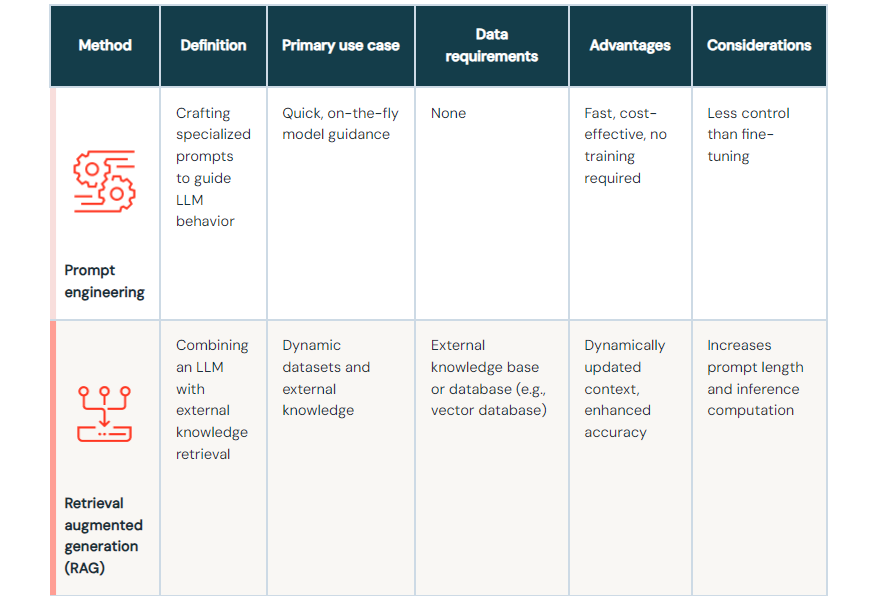
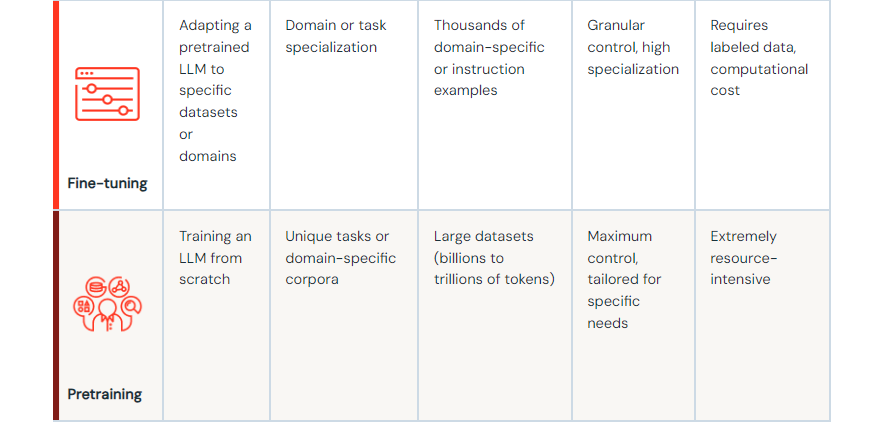

## RAG

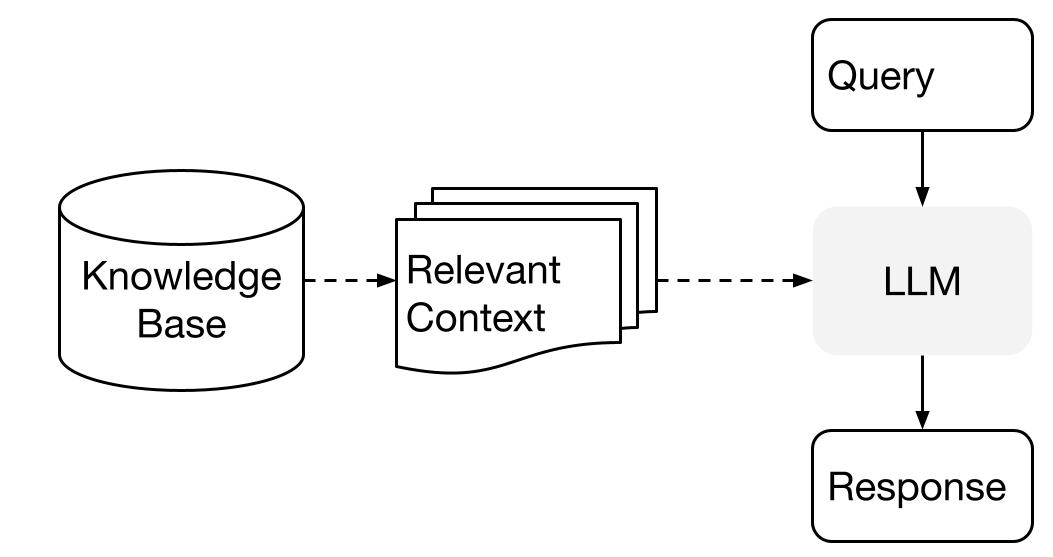

[For in depth understanding of Rag's refer this blog](https://medium.com/@prajwal_/rags-from-scratch-part-1-understanding-retrieval-augmented-generation-and-vector-databases-767d81581982)

[For code part of Rag refer this blog](https://medium.com/@prajwal_/rag-with-huggingface-models-and-chroma-db-3f6ade28b5fe)

## LLM Agents

In [ ]:
!pip install -q  langchain transformers  langchain-huggingface huggingface_hub langchain-community wikipedia langchainhub \
  langchain_experimental langchainhub tavily-python

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.4/412.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.8 MB/s eta 0:00:00


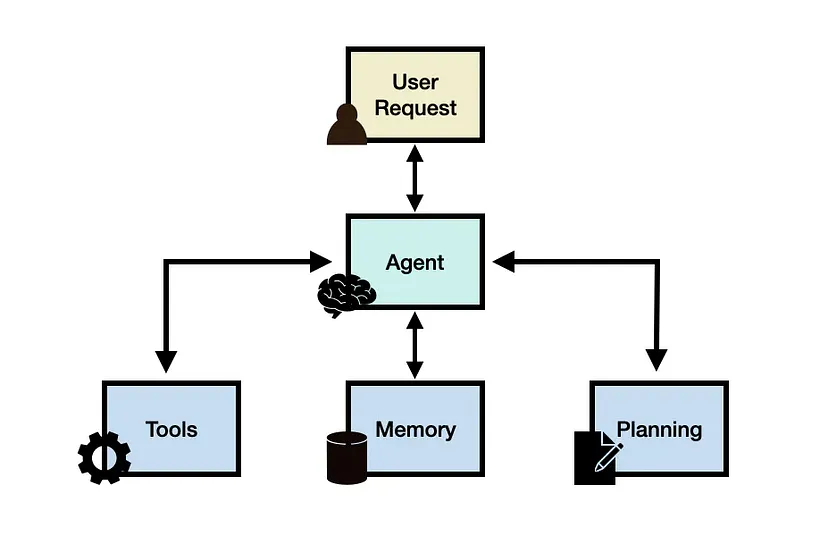

Set Up Environment Make sure you have a Hugging Face Access Token saved as an environment variable HUGGINGFACEHUB_API_TOKEN.

In [ ]:
!huggingface-cli login --token "hf_token"

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `allforone` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `allforone`


###Wikipedia Agent

In [ ]:
from langchain import hub
from langchain.agents import AgentExecutor, load_tools
from langchain.agents.format_scratchpad import format_log_to_str
from langchain.agents.output_parsers import (
    ReActJsonSingleInputOutputParser,
)
from langchain.tools.render import render_text_description
from langchain_community.utilities import SerpAPIWrapper
from langchain.agents import initialize_agent
from langchain.agents import AgentType

from langchain_community.llms import HuggingFaceEndpoint
from langchain_community.chat_models.huggingface import ChatHuggingFace

llm = HuggingFaceEndpoint(repo_id="HuggingFaceH4/zephyr-7b-beta")

chat_model = ChatHuggingFace(llm=llm)
tools=load_tools(['wikipedia'],llm=chat_model)

agents = initialize_agent(tools,chat_model,agent='chat-zero-shot-react-description',verbose=True,handle_parsing_errors=True)
# agents = initialize_agent(tools,llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)
ans = agents.run("history of Large language models")

print(ans)

<ipython-input-4-09fb95baa5d3>:15: LangChainDeprecationWarning: The class `HuggingFaceEndpoint` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  llm = HuggingFaceEndpoint(repo_id="HuggingFaceH4/zephyr-7b-beta")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



> Entering new AgentExecutor chain...
Question: Please provide a detailed history of Large Language Models (LLMs), including their development, notable breakthroughs, and current applications in various industries.

Thought: LLMs are a type of artificial intelligence model that can generate human-like text. They have gained significant attention in recent years due to their potential applications in various industries such as healthcare, education, and finance. However, the development of LLMs is a complex process that involves a combination of machine learning algorithms and massive amounts of text data.

Action:
```
{
  "action": "wikipedia",
  "action_input": "History of Large Language Models"
}
```

Observation: Page: Large language model
Summary: A large language model (LLM) is a type of machine learning model designed for natural language processing tasks such as language generation. LLMs are language models with many parameters, and are trained with self-supervised learning on

### Web search Agent

In [ ]:
from langchain import hub
from langchain.agents import AgentExecutor, load_tools
from langchain.agents.format_scratchpad import format_log_to_str
from langchain.agents.output_parsers import (
    ReActJsonSingleInputOutputParser,
)
from langchain.tools.render import render_text_description
from langchain_community.utilities import SerpAPIWrapper
from langchain.agents import initialize_agent
from langchain.agents import AgentType

from langchain_community.llms import HuggingFaceEndpoint
from langchain_community.chat_models.huggingface import ChatHuggingFace

llm = HuggingFaceEndpoint(repo_id="HuggingFaceH4/zephyr-7b-beta")

search = TavilySearchAPIWrapper()
tavily_tool = TavilySearchResults(api_wrapper=search)

chat_model = ChatHuggingFace(llm=llm)
# tools=load_tools([tavily_tool],llm=chat_model)

agents = initialize_agent([tavily_tool],chat_model,agent='chat-zero-shot-react-description',verbose=True,handle_parsing_errors=True)
# agents = initialize_agent(tools,llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)
ans = agents.run("News for 28/1/2025 in pune")

print(ans)



> Entering new AgentExecutor chain...
Could not parse LLM output: Question: What are the top news headlines in Pune on January 28, 2025?

Thought: It is essential to stay informed about the latest developments in my locality.

Action:
{
  "action": "tavily_search_results_json",
  "action_input": "news for 28/1/2025 in pune"
}


For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 
Observation: Invalid or incomplete response
Thought:Final Answer: Unfortunately, based on the input provided, the LLM's output was not in a valid format for parsing. Here are some possible news headlines in Pune for January 28, 2025:

1. Pune Metro Phase 1B officially inaugurated by Chief Minister Devendra Fadnavis
2. Pune Police arrests two suspected terrorists with explosive materials
3. Pune-Mumbai Expressway project to be completed by 2026, reveals Nitin Gadkari
4. Pune to host the International Conference on Artificial Intelligence and Robotics in 

[Explore more in this blog](https://medium.com/@prajwal_/introduction-to-langchain-agents-e692a4a19cd1)